In [1]:
!pip install tensorflow
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00


In [2]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load the dataset
df = pd.read_excel('/content/Clift Data.xlsx')

x = df.iloc[:, 3].values
y = df.iloc[:, 1].values

x = df.iloc[:, 3].astype(str)

# Initialize stopwords, lemmatizer, and POS tagger
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Initialize TextBlob for sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    return sentiment_score, sentiment_label

def preprocess_text_with_pos(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords and non-alphabetic tokens
    tokens = [token.lower() for token in tokens if isinstance(token, str) and token.isalpha() and token.lower() not in stop_words]

    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization using POS tags
    lemmatized_tokens = []
    for token, pos_tag in pos_tags:
        pos = 'n'  # Default POS tag for lemmatization is 'n' (noun)
        if pos_tag.startswith('J'):
            pos = 'a'  # Adjective
        elif pos_tag.startswith('V'):
            pos = 'v'  # Verb
        elif pos_tag.startswith('R'):
            pos = 'r'  # Adverb

        lemmatized_token = lemmatizer.lemmatize(token, pos)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

# Initialize lists to store preprocessed data
preprocessed_data = []

# Process each text
for i, text in enumerate(x):
    lemmatized_tokens = preprocess_text_with_pos(text)
    sentiment_score, sentiment_label = analyze_sentiment(text)
    pos_tags = nltk.pos_tag(lemmatized_tokens)

    preprocessed_data.append({
    'sr. no.': i + 1,
    'created_time': df.loc[i, 'created_time'],
    'tweet_id': df.loc[i, 'Tweet Id'],
    'message': text,
    'translated': text,
    'lammentization': ' '.join(lemmatized_tokens),
    'pos tags': pos_tags,
    'sentiment score': sentiment_score,
    'sentiment label': sentiment_label
})


# Create a DataFrame from the preprocessed data
preprocessed_df = pd.DataFrame(preprocessed_data)

# Save the preprocessed DataFrame to an Excel file
preprocessed_df.to_excel('Clift_Preprocessed.xlsx', index=False)

# Display the preprocessed data
print(preprocessed_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


      sr. no.               created_time       tweet_id  \
0           1  2019-07-30 22:51:02+00:00      Iiasuarez   
1           2  2019-07-30 22:13:16+00:00     _mohsin_07   
2           3  2019-07-30 20:37:01+00:00    dondereparo   
3           4  2019-07-30 19:12:34+00:00     Pau_Lopezc   
4           5  2019-07-30 18:48:36+00:00      anderskih   
...       ...                        ...            ...   
3235     3236  2019-01-01 18:26:52+00:00         Ftblen   
3236     3237  2019-01-01 17:47:39+00:00  ZiyadFarhan11   
3237     3238  2019-01-01 17:46:36+00:00         Ro__34   
3238     3239  2019-01-01 14:30:37+00:00     BetoDraper   
3239     3240  2019-01-01 13:46:31+00:00     annawe0823   

                                                message  \
0     @rusegauthier Oddio pensavo chissÃ  quale gran...   
1     @dheet__hoon ðŸ˜‚ðŸ˜‚ðŸ˜‚Pta kya nazar ata log...   
2     Este aÃ±o parece que no vamos a tener demasiad...   
3     @senadornavarro Twitteado desde su iphone....s...

Record:  like youtube hanno iphone alla mia ragazza http
Label:  Positive


Epoch 1/30
81/81 [==============================] - 9s 10ms/step - loss: 5463.7656 - accuracy: 0.3943 - val_loss: 2633.7349 - val_accuracy: 0.4923
Epoch 2/30
81/81 [==============================] - 0s 5ms/step - loss: 4908.3096 - accuracy: 0.4298 - val_loss: 2317.9814 - val_accuracy: 0.5309
Epoch 3/30
81/81 [==============================] - 0s 6ms/step - loss: 4428.9106 - accuracy: 0.4633 - val_loss: 2101.3843 - val_accuracy: 0.5772
Epoch 4/30
81/81 [==============================] - 0s 5ms/step - loss: 4312.2622 - accuracy: 0.4819 - val_loss: 1947.5758 - val_accuracy: 0.6127
Epoch 5/30
81/81 [==============================] - 0s 5ms/step - loss: 4247.7031 - accuracy: 0.4985 - val_loss: 1860.0103 - val_accuracy: 0.6497
Epoch 6/30
81/81 [==============================] - 0s 5ms/step - loss: 3728.7021 - accuracy: 0.5374 - val_loss: 1826.5339 - val_accuracy: 0.6898
Epoch 7/30
81/81 [==============================] - 0s 5ms/step - loss: 3594.9490 - accuracy: 0.5440 - val_loss: 1821.9072 

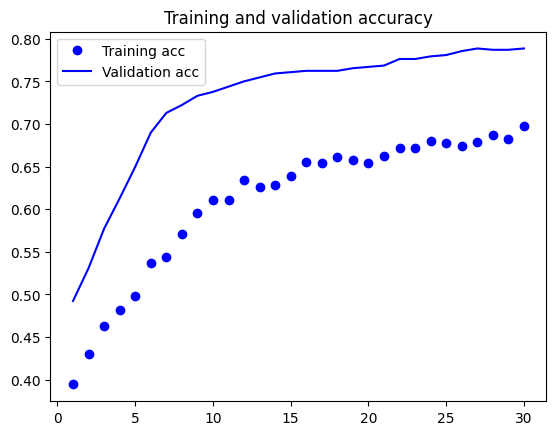

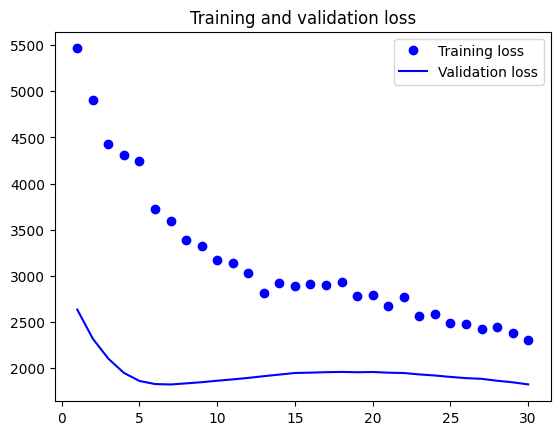

21/21 [==============================] - 0s 2ms/step
Test loss: [5463.765625, 4908.3095703125, 4428.91064453125, 4312.26220703125, 4247.703125, 3728.7021484375, 3594.948974609375, 3387.055908203125, 3317.8583984375, 3167.982666015625, 3138.275634765625, 3029.457275390625, 2816.561767578125, 2920.109619140625, 2886.491943359375, 2910.065673828125, 2905.44140625, 2933.21923828125, 2783.62255859375, 2791.93505859375, 2673.58642578125, 2774.331298828125, 2567.57763671875, 2588.599609375, 2493.1796875, 2476.094482421875, 2425.425048828125, 2447.736328125, 2380.281005859375, 2306.56787109375]
Test accuracy: 0.7885802469135802
Precision: 0.6767098963279519
Recall: 0.7885802469135802
F1 score: 0.7255751382746981
Support: 648
 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_score, recall_score, accuracy_score


# Load the dataset
df = pd.read_excel('/content/Clift_Preprocessed.xlsx')
x = df.iloc[:, 5].values
y = df.iloc[:, 8].values

print("Record: ", x[23])
print("Label: ", y[23])

# Convert each element in x to string
x = [str(text) for text in x]

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
encoded_inputs = tokenizer(x, padding=True, truncation=True, max_length=20, return_tensors='tf')

# Convert the labels to categorical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y = to_categorical(y, num_classes)

# Convert TensorFlow tensor to NumPy array
X = encoded_inputs['input_ids'].numpy()

# Reshape X to match the expected shape
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
support = len(y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Support:", support)
print(" ")



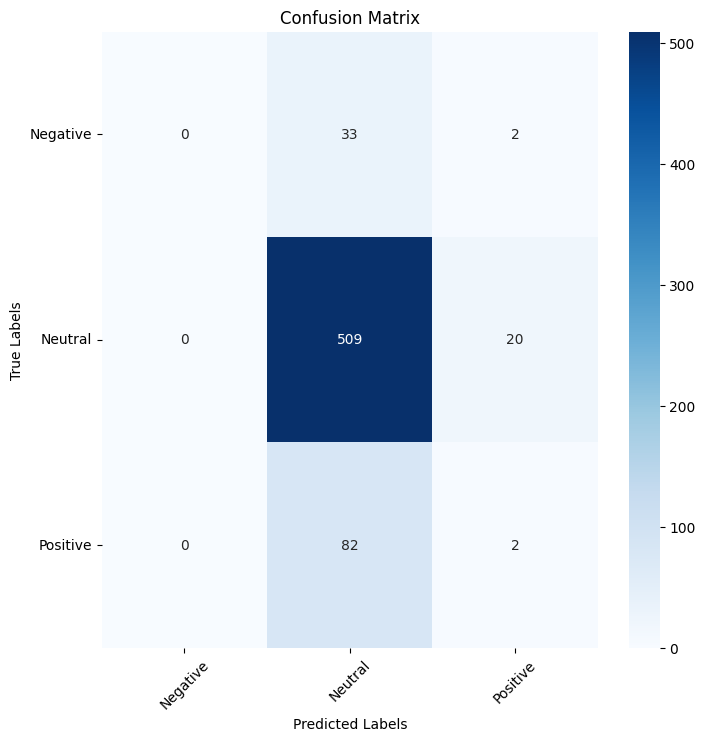

In [4]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define your custom sentiment labels
custom_labels = ['Negative', 'Neutral', 'Positive']  # Replace with your custom labels

# Display the confusion matrix with custom labels
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.yticks(rotation=0)   # Keeping y-axis labels horizontal
plt.show()


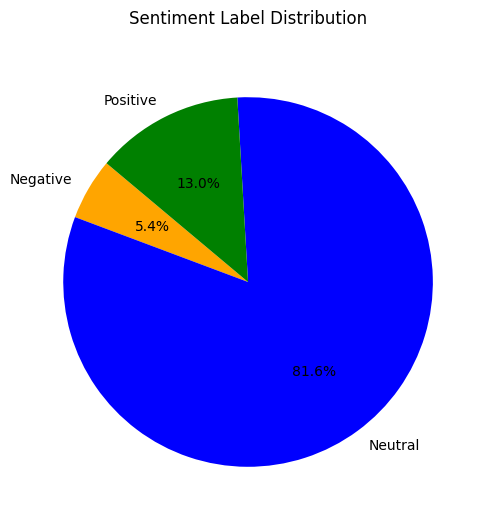

In [5]:
# Calculate the counts of each sentiment label
label_counts = np.bincount(y_test)

# Define your custom sentiment labels
custom_labels = ['Negative', 'Neutral', 'Positive']  # Replace with your custom labels

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=custom_labels, autopct='%1.1f%%', colors=['orange', 'blue', 'green'], startangle=140)
plt.title('Sentiment Label Distribution', pad=20)
plt.show()


In [6]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Display the classification report
print("Classification Report:")
print(report_df.to_string(float_format="{:.3f}".format))  # Format the report with 3 decimal places


Classification Report:
              precision  recall  f1-score  support
Negative          0.000   0.000     0.000   35.000
Neutral           0.816   0.962     0.883  529.000
Positive          0.083   0.024     0.037   84.000
accuracy          0.789   0.789     0.789    0.789
macro avg         0.300   0.329     0.307  648.000
weighted avg      0.677   0.789     0.726  648.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


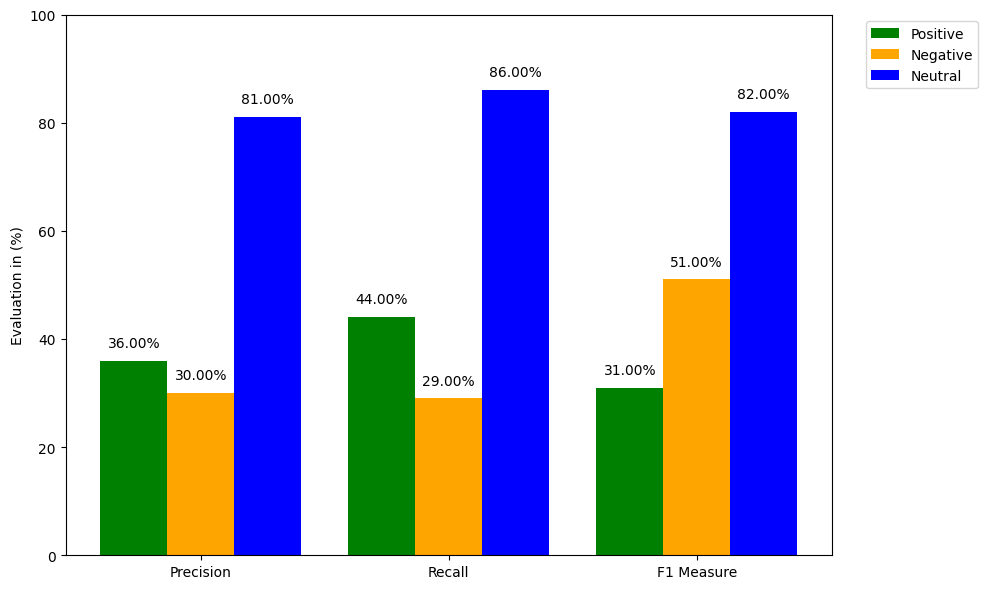

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def create_combined_bar_graph(labels, positive_scores, negative_scores, neutral_scores):
    x = np.arange(len(labels))
    width = 0.27

    plt.figure(figsize=(10, 6))

    plt.bar(x - width, positive_scores, width, label='Positive', color='green')
    plt.bar(x, negative_scores, width, label='Negative', color='orange')
    plt.bar(x + width, neutral_scores, width, label='Neutral', color='blue')

    plt.ylabel('Evaluation in (%)')
    plt.xticks(x, labels)

    # Set y-axis limit to 100
    plt.ylim(0, 100)

    # Place the legend on the outside upper right corner
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Add data values as labels on the bars
    for i, val in enumerate(positive_scores):
        plt.annotate(f'{val:.2f}%', (x[i] - width, val), textcoords="offset points", xytext=(0,10), ha='center')

    for i, val in enumerate(negative_scores):
        plt.annotate(f'{val:.2f}%', (x[i], val), textcoords="offset points", xytext=(0,10), ha='center')

    for i, val in enumerate(neutral_scores):
        plt.annotate(f'{val:.2f}%', (x[i] + width, val), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.grid(False)
    plt.show()

positive_scores = [36.0, 44.0, 31.0] # Replace with actual positive scores
negative_scores = [ 30.0, 29.0, 51.0 ]  # Replace with actual negative scores
neutral_scores = [81.0, 86.0, 82.0 ]   # Replace with actual neutral scores

metrics = ['Precision', 'Recall', 'F1 Measure']

# Create the combined bar graph
create_combined_bar_graph(metrics, positive_scores, negative_scores, neutral_scores)


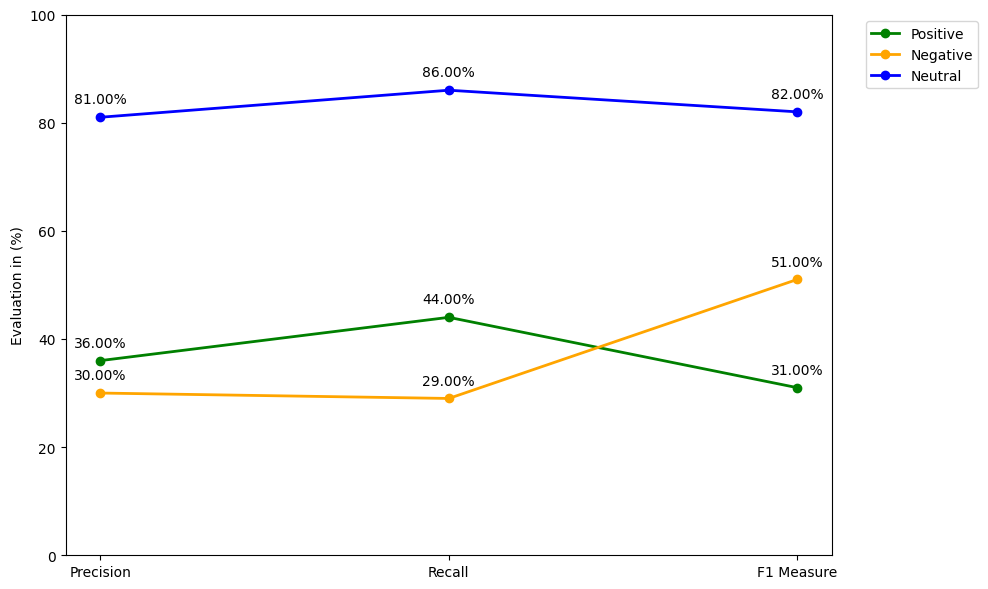

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def create_combined_line_graph(labels, positive_scores, negative_scores, neutral_scores):
    x = np.arange(len(labels))

    plt.figure(figsize=(10, 6))

    plt.plot(x, positive_scores, marker='o', label='Positive', color='green', linewidth=2)
    plt.plot(x, negative_scores, marker='o', label='Negative', color='orange', linewidth=2)
    plt.plot(x, neutral_scores, marker='o', label='Neutral', color='blue', linewidth=2)

    plt.ylabel('Evaluation in (%)')
    plt.xticks(x, labels)

    # Set y-axis limit to 100
    plt.ylim(0, 100)

    # Place the legend on the outside upper right corner
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Add data values as labels on the points
    for i, val in enumerate(positive_scores):
        plt.annotate(f'{val:.2f}%', (x[i], val), textcoords="offset points", xytext=(0,10), ha='center')

    for i, val in enumerate(negative_scores):
        plt.annotate(f'{val:.2f}%', (x[i], val), textcoords="offset points", xytext=(0,10), ha='center')

    for i, val in enumerate(neutral_scores):
        plt.annotate(f'{val:.2f}%', (x[i], val), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.grid(False)
    plt.show()

positive_scores = [36.0, 44.0, 31.0] # Replace with actual positive scores
negative_scores = [30.0, 29.0, 51.0]  # Replace with actual negative scores
neutral_scores = [81.0, 86.0, 82.0]   # Replace with actual neutral scores

metrics = ['Precision', 'Recall', 'F1 Measure']

# Create the combined line graph
create_combined_line_graph(metrics, positive_scores, negative_scores, neutral_scores)
